# Global Variavbles

In [1]:
import easydict
import json
args = easydict.EasyDict()


# path 정보
# path 정보
args.default_path = 'C:/Users/Playdata/Desktop/encore21titanic/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.submission_csv = args.default_path+'submission.csv'
args.submission_file = args.default_path+'submission_0223.csv'


# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 데이터 로드

In [3]:
train = pd.read_csv(args.train_csv)
print(f'{train.shape}')
train.head()

(916, 12)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [4]:
test = pd.read_csv(args.test_csv)
print(f'{test.shape}')
test.head()

(393, 11)


,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [5]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [6]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [7]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [8]:
ori_test.set_index(['passengerid'], inplace=True) 
print(f'{ori_test.shape}')
ori_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [9]:
ori_train.shape, ori_test.shape

((916, 11), (393, 10))

# EDA

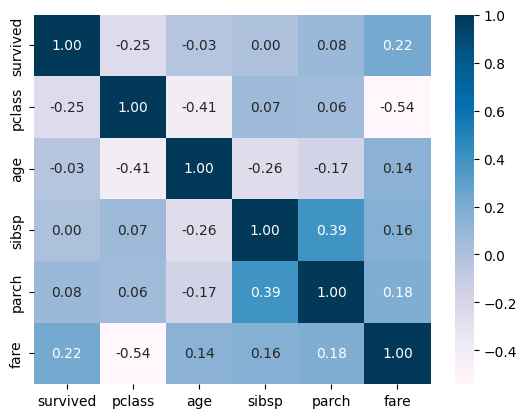

In [10]:
g = sns.heatmap(train.iloc[:, 1:].corr(),
                annot=True, 
                fmt = ".2f", 
                cmap = "PuBu")

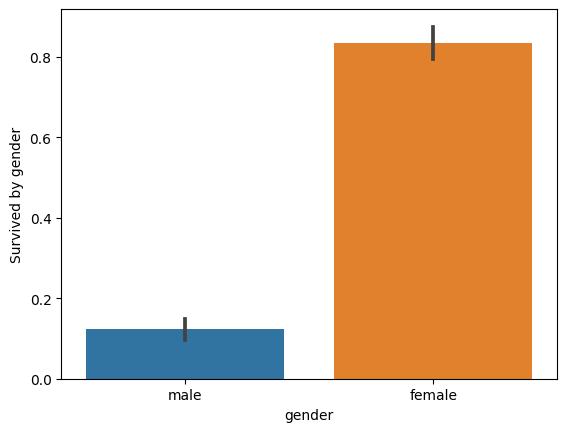

In [11]:
g = sns.barplot(x="gender",y="survived",data=train)
g = g.set_ylabel("Survived by gender")

- 남성이 많이 사망했다.

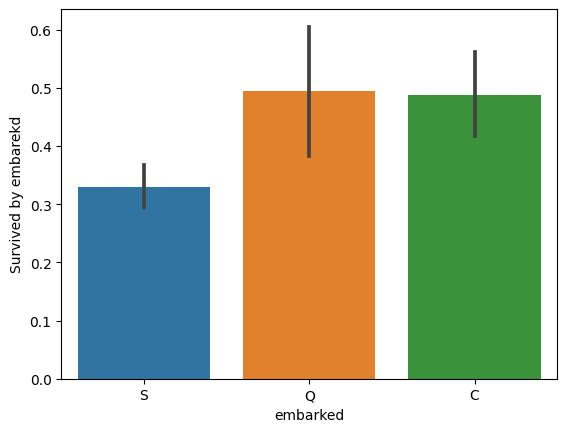

In [12]:
g = sns.barplot(x="embarked",y="survived",data=train)
g = g.set_ylabel("Survived by embarekd")

- Q에서 탑승한 사람들이 생존률이 높다. 

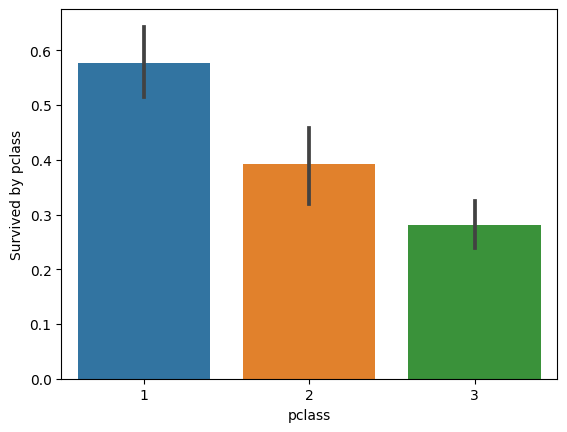

In [13]:
g = sns.barplot(x="pclass",y="survived",data=train)
g = g.set_ylabel("Survived by pclass")

- pclass 순서대로 생존률이 높다.

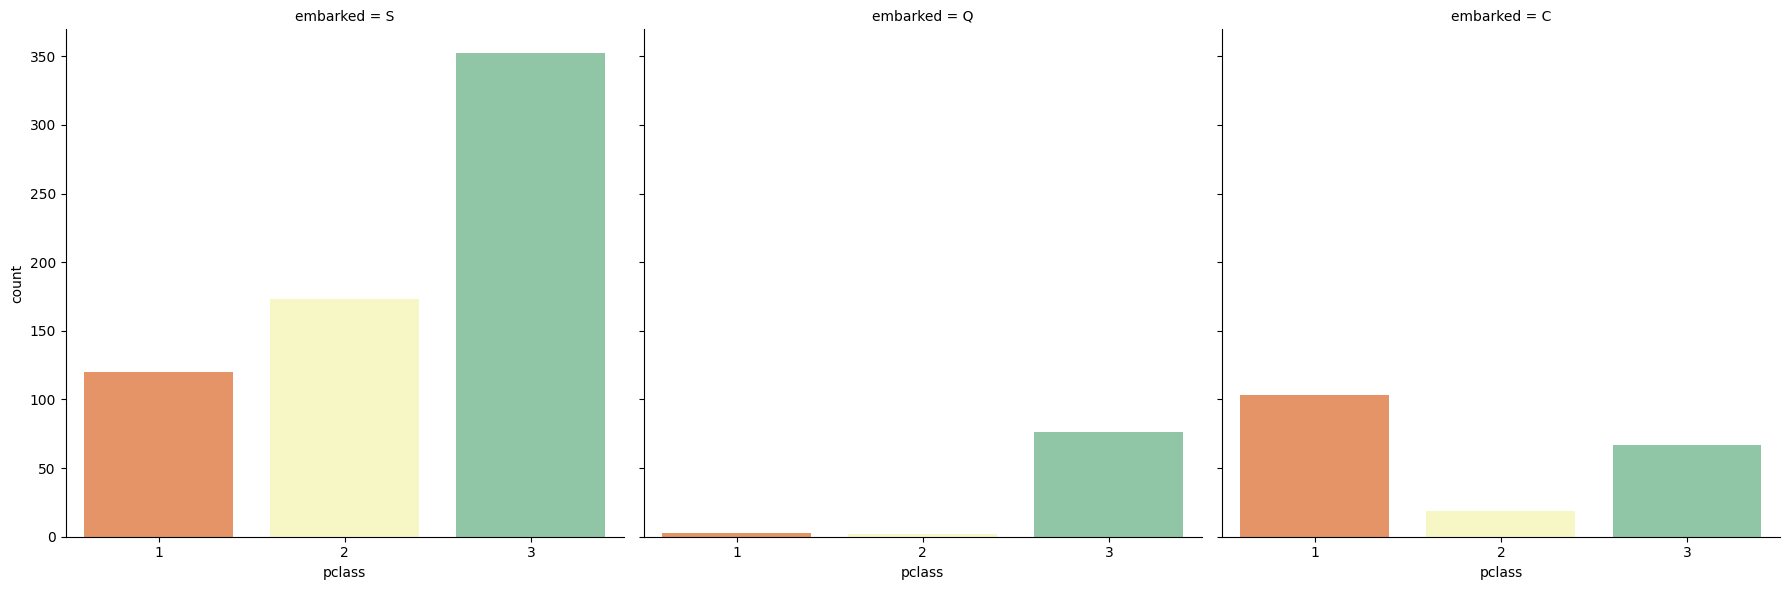

In [14]:
g = sns.catplot(x="pclass", data=train, height=6, kind="count", palette="Spectral", col='embarked')
g = g.set_ylabels("count")

- pclass 3의 승선 비율이 높은 S 항구는 사망률이 높을 것이다.

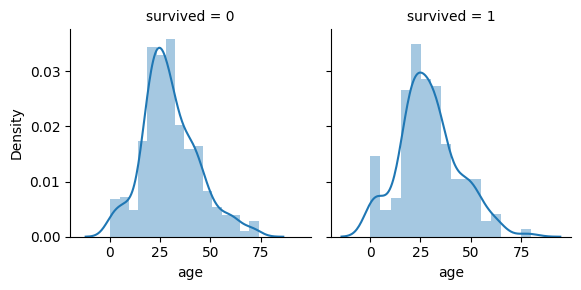

In [15]:
g = sns.FacetGrid(train, col='survived')
g = g.map(sns.distplot, "age")

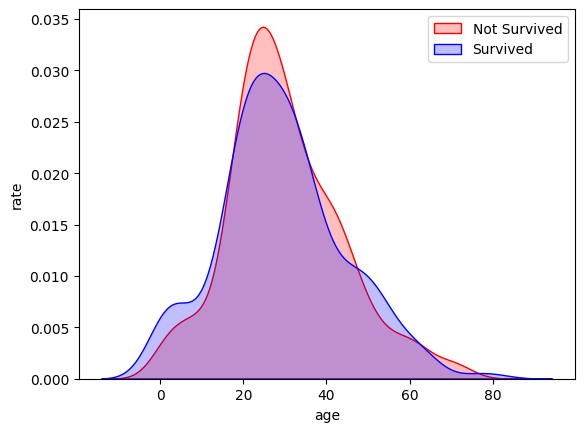

In [16]:
g = sns.kdeplot(train["age"][(train["survived"] == 0) & (train["age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["age"][(train["survived"] == 1) & (train["age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("age")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 어린 아이들은 생존률이 높다.
- 20-40세 사이는 생존률이 낮아 보인다.

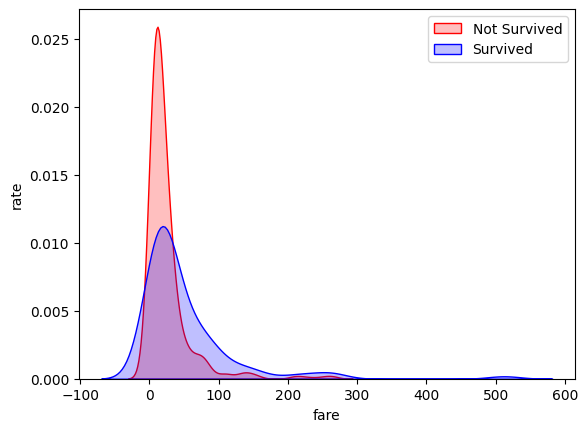

In [17]:
g = sns.kdeplot(train["fare"][(train["survived"] == 0) & (train["age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["fare"][(train["survived"] == 1) & (train["age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("fare")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 지불한 비용이 낮을수록 생존률이 낮다.

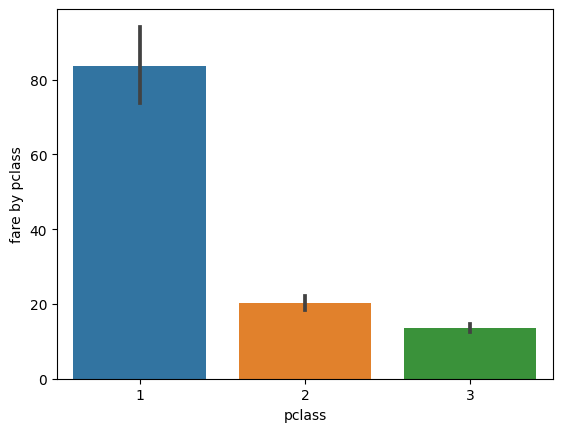

In [18]:
g = sns.barplot(x="pclass",y="fare",data=train)
g = g.set_ylabel("fare by pclass")

- 지불 비용은 pclass 순서대로 높다.

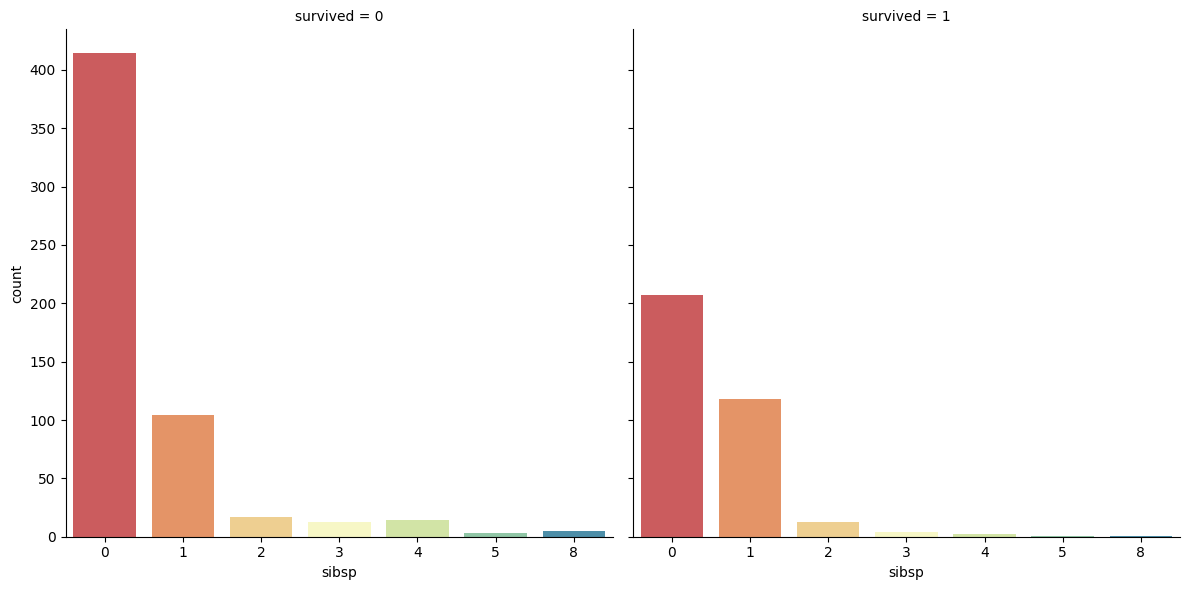

In [19]:
g = sns.catplot(x="sibsp", data=train, height=6, kind="count", palette="Spectral", col='survived')
g = g.set_ylabels("count")

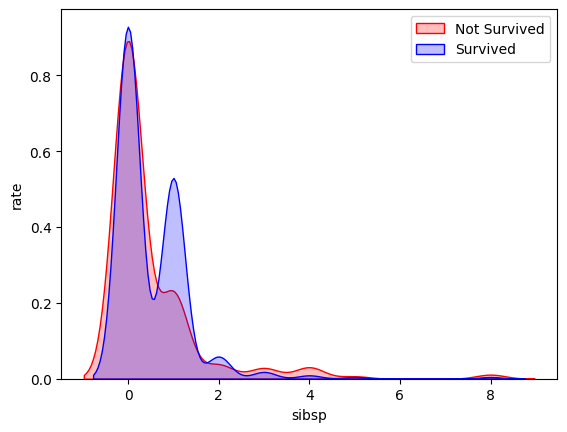

In [20]:
g = sns.kdeplot(train["sibsp"][(train["survived"] == 0) & (train["sibsp"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["sibsp"][(train["survived"] == 1) & (train["sibsp"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("sibsp")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 동승한 자매, 배우자 수가 없을 때보다 소수 있을 때 생존률이 높다.

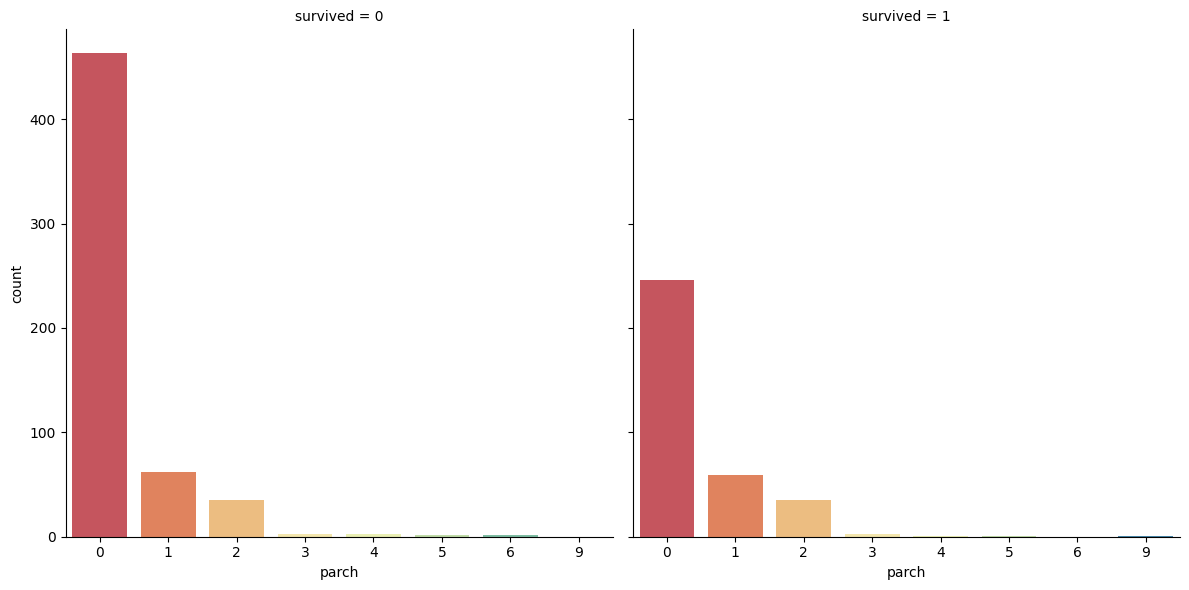

In [21]:
g = sns.catplot(x="parch", data=train, height=6, kind="count", palette="Spectral", col='survived')
g = g.set_ylabels("count")

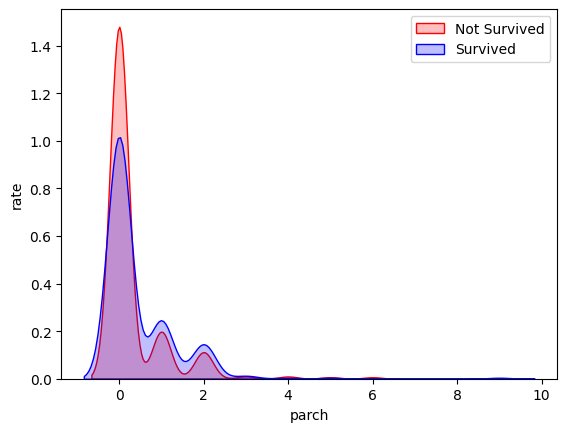

In [22]:
g = sns.kdeplot(train["parch"][(train["survived"] == 0) & (train["parch"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["parch"][(train["survived"] == 1) & (train["parch"].notnull())], ax=g, color="Blue", shade= True)
g.set_xlabel("parch")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 동승한 부모, 자녀가 없으면 사망률이 매우 높다.

# 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [25]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.3, random_state = args.random_state)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

# Model Version 1

In [26]:
train = X_tr.copy() 
test = X_te.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((641, 10), (275, 10), (393, 10))

## Data Preprocessing

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   name      641 non-null    object 
 2   gender    641 non-null    object 
 3   age       512 non-null    float64
 4   sibsp     641 non-null    int64  
 5   parch     641 non-null    int64  
 6   ticket    641 non-null    object 
 7   fare      641 non-null    float64
 8   cabin     135 non-null    object 
 9   embarked  641 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 55.1+ KB


In [28]:
train.describe()

,pclass,age,sibsp,parch,fare
count,641.000000,512.000000,641.000000,641.000000,641.000000
mean,2.305772,30.344082,0.466459,0.368175,31.654446
std,0.829221,14.492658,0.961386,0.897140,49.827609
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.400000
75%,3.000000,38.000000,1.000000,0.000000,30.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [29]:
train.describe(include='O')

,name,gender,ticket,cabin,embarked
count,641,641,641,135,641
unique,641,2,529,110,3
top,"Ohman, Miss. Velin",male,3101295,B96 B98,S
freq,1,407,5,3,455


### Drop Values
- 지나치게 세분화된 데이터들을 drop한다.

In [30]:
train['cabin'].nunique()

110

In [31]:
train['ticket'].nunique()

529

In [32]:
train.drop(['cabin', 'ticket'], axis=1, inplace=True)
test.drop(['cabin', 'ticket'], axis=1, inplace=True)
ori_te.drop(['cabin', 'ticket'], axis=1, inplace=True)

print(train.shape, test.shape)

(641, 8) (275, 8)


### Missing Values

In [33]:
train.isnull().sum()

pclass        0
name          0
gender        0
age         129
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [34]:
test.isnull().sum()

pclass       0
name         0
gender       0
age         51
sibsp        0
parch        0
fare         0
embarked     1
dtype: int64

In [35]:
ori_te.isnull().sum()

pclass       0
name         0
gender       0
age         83
sibsp        0
parch        0
fare         1
embarked     1
dtype: int64

#### age
- 원래 데이터의 분포를 최대한 보존하기 위해 train에서 random sampling 한다.

In [36]:
random_sampling = (train['age'].dropna().sample(train['age'].isnull().sum()))
random_sampling.index = train[lambda x : x['age'].isnull()].index
train.loc[train['age'].isnull(), 'age'] = random_sampling
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,Q
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,S
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,C
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,S


In [37]:
train.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [38]:
random_sampling = (train['age'].dropna().sample(test['age'].isnull().sum()))
random_sampling.index = test[lambda x : x['age'].isnull()].index
test.loc[test['age'].isnull(), 'age'] = random_sampling
test.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    1
dtype: int64

In [39]:
random_sampling = (train['age'].dropna().sample(ori_te['age'].isnull().sum()))
random_sampling.index = ori_te[lambda x : x['age'].isnull()].index
ori_te.loc[ori_te['age'].isnull(), 'age'] = random_sampling
ori_te.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        1
embarked    1
dtype: int64

#### embarked
- 최빈값으로 replace한다.

In [40]:
embarked_mode = train['embarked'].mode().values[0]
embarked_mode

'S'

In [41]:
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

test.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [42]:
ori_te.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

#### fare
- median 값으로 채워준다.

In [43]:
median_fare = train['fare'].median()
median_fare

14.4

In [44]:
ori_te['fare'].fillna(median_fare, inplace=True)

In [45]:
ori_te.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## Feature Extraction

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   name      641 non-null    object 
 2   gender    641 non-null    object 
 3   age       641 non-null    float64
 4   sibsp     641 non-null    int64  
 5   parch     641 non-null    int64  
 6   fare      641 non-null    float64
 7   embarked  641 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 45.1+ KB


### 성별을 범주형으로 변환
- 종류가 2개뿐이라서, map 이용 
- 범주형 변환하지 않고 인코딩 하는 방법도 고려해보아야 함

In [47]:
train['gender'] = train['gender'].map({'female' : 1, 'male' : 0 }).astype(int)
test['gender'] = test['gender'].map({'female' : 1, 'male' : 0 }).astype(int)
ori_te['gender'] = ori_te['gender'].map({'female' : 1, 'male' : 0 }).astype(int)
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked
812,3,"Ohman, Miss. Velin",1,22.0,0,0,7.7750,S
134,3,"Buckley, Mr. Daniel",0,21.0,0,0,7.8208,Q
390,3,"Jonsson, Mr. Carl",0,32.0,0,0,7.8542,S
305,3,"Hassan, Mr. Houssein G N",0,11.0,0,0,18.7875,C
203,3,"Corn, Mr. Harry",0,30.0,0,0,8.0500,S


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   name      641 non-null    object 
 2   gender    641 non-null    int32  
 3   age       641 non-null    float64
 4   sibsp     641 non-null    int64  
 5   parch     641 non-null    int64  
 6   fare      641 non-null    float64
 7   embarked  641 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 42.6+ KB


### add designation
- designation을 추가하고 획일화 해준다. 

In [49]:
dict_designation = {
    #성별 
    'Mr': '남성',
    'Master': '남성',
    'Sir': '남성',
    'Miss': '미혼 여성',
    'Mrs': '기혼 여성',
    'Ms': '미혼/기혼 여성',
    'Lady': '숙녀',
    'Mlle': '아가씨',
    # 직업
    'Dr': '의사',
    'Rev': '목사',
    'Major': '계급',
    'Don': '교수',
    'Col': '군인',
    'Capt': '군인',
    # 귀족
    'Mme': '영부인',
    'Countess': '백작부인',
    'Jonkheer': '귀족'
}


def add_designation(name) :
    designation = 'unknown'
    for key in dict_designation.keys() :
        if key in name :
            designation = key
            break
    return designation

train['designation'] = train['name'].map(lambda x : add_designation(x))
test['designation'] = test['name'].map(lambda x : add_designation(x))
ori_te['designation'] = ori_te['name'].map(lambda x : add_designation(x))

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation
812,3,"Ohman, Miss. Velin",1,22.0,0,0,7.7750,S,Miss
134,3,"Buckley, Mr. Daniel",0,21.0,0,0,7.8208,Q,Mr
390,3,"Jonsson, Mr. Carl",0,32.0,0,0,7.8542,S,Mr
305,3,"Hassan, Mr. Houssein G N",0,11.0,0,0,18.7875,C,Mr
203,3,"Corn, Mr. Harry",0,30.0,0,0,8.0500,S,Mr


In [50]:
# 반복문 사용할 수 있을듯... 나중에 해보기 
train['designation'] = train['designation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir', 'Dona'], 'Rare')
train['designation'] = train['designation'].replace('Mlle','Miss')
train['designation'] = train['designation'].replace('Ms','Miss')
train['designation'] = train['designation'].replace('Mme','Mrs')

test['designation'] = test['designation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir', 'Dona'], 'Rare')
test['designation'] = test['designation'].replace('Mlle','Miss')
test['designation'] = test['designation'].replace('Ms','Miss')
test['designation'] = test['designation'].replace('Mme','Mrs')

ori_te['designation'] = ori_te['designation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir', 'Dona'], 'Rare')
ori_te['designation'] = ori_te['designation'].replace('Mlle','Miss')
ori_te['designation'] = ori_te['designation'].replace('Ms','Miss')
ori_te['designation'] = ori_te['designation'].replace('Mme','Mrs')

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation
812,3,"Ohman, Miss. Velin",1,22.0,0,0,7.7750,S,Miss
134,3,"Buckley, Mr. Daniel",0,21.0,0,0,7.8208,Q,Mr
390,3,"Jonsson, Mr. Carl",0,32.0,0,0,7.8542,S,Mr
305,3,"Hassan, Mr. Houssein G N",0,11.0,0,0,18.7875,C,Mr
203,3,"Corn, Mr. Harry",0,30.0,0,0,8.0500,S,Mr


### add job
- 직업이 생존률과 관련이 있을 수 있으므로, 추가해준다. 

In [51]:
dict_job = {
    'Mr': 'Others',
    'Master': 'Others',
    'Miss': 'Others',
    'Mrs': 'Others',
    'Ms': 'Others',
    'Mlle': 'Others',
    # 직업
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer',
    # 귀족
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Mme': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty'
}

def add_job(name) :
    job = 'others'
    for key in dict_job.keys() :
        if key in name :
            job = dict_job[key]
            break
    return job

train['job'] = train['name'].map(lambda x : add_job(x))
test['job'] = test['name'].map(lambda x : add_job(x))
ori_te['job'] = ori_te['name'].map(lambda x : add_job(x))

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation,job
812,3,"Ohman, Miss. Velin",1,22.0,0,0,7.7750,S,Miss,Others
134,3,"Buckley, Mr. Daniel",0,21.0,0,0,7.8208,Q,Mr,Others
390,3,"Jonsson, Mr. Carl",0,32.0,0,0,7.8542,S,Mr,Others
305,3,"Hassan, Mr. Houssein G N",0,11.0,0,0,18.7875,C,Mr,Others
203,3,"Corn, Mr. Harry",0,30.0,0,0,8.0500,S,Mr,Others


### add sub_age
- 그래프에서 특정 연령대의 생존률이 높은 것을 확인했으므로, sub_age를 생성해준다.
- age_group을 만들어 보는 것도 좋은 방법 같아 보인다. 나중에 해보기

In [52]:
train['sub_age'] = train['age'] // 10
test['sub_age'] = test['age'] // 10
ori_te['sub_age'] = ori_te['age'] // 10

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age
812,3,"Ohman, Miss. Velin",1,22.0,0,0,7.7750,S,Miss,Others,2.0
134,3,"Buckley, Mr. Daniel",0,21.0,0,0,7.8208,Q,Mr,Others,2.0
390,3,"Jonsson, Mr. Carl",0,32.0,0,0,7.8542,S,Mr,Others,3.0
305,3,"Hassan, Mr. Houssein G N",0,11.0,0,0,18.7875,C,Mr,Others,1.0
203,3,"Corn, Mr. Harry",0,30.0,0,0,8.0500,S,Mr,Others,3.0


### Scaling
- fare과 age를 StandardScaler로 스케일링 해준다.
- 다른 Sclaer를 이용하면 어떻게 변화할지 더 알아보면 좋을 것 같다.

In [53]:
train['fare'].skew(), train['fare'].kurt()

(4.729119155987176, 31.95993231511127)

In [54]:
train['age'].skew(), train['age'].kurt()

(0.5966473427807278, 0.6241466523756398)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scale = StandardScaler().fit(train[['age','fare']])
train[['age','fare']] = scale.transform(train[['age','fare']])
test[['age','fare']] = scale.transform(test[['age','fare']])
ori_te[['age','fare']] = scale.transform(ori_te[['age','fare']])

In [57]:
train.isnull().sum()

pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
fare           0
embarked       0
designation    0
job            0
sub_age        0
dtype: int64

### add accompany
- sibsp, parch를 모두 고려한 동행자 수 feature를 만들어 보았다.

In [60]:
train['accompany'] = train['sibsp'] + train['parch']
test['accompany'] = test['sibsp'] + test['parch']
ori_te['accompany'] = ori_te['sibsp'] + ori_te['parch']
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age,accompany
812,3,"Ohman, Miss. Velin",1,-0.580001,0,0,-0.479616,S,Miss,Others,2.0,0
134,3,"Buckley, Mr. Daniel",0,-0.649931,0,0,-0.478696,Q,Mr,Others,2.0,0
390,3,"Jonsson, Mr. Carl",0,0.119295,0,0,-0.478025,S,Mr,Others,3.0,0
305,3,"Hassan, Mr. Houssein G N",0,-1.349227,0,0,-0.258431,C,Mr,Others,1.0,0
203,3,"Corn, Mr. Harry",0,-0.020564,0,0,-0.474092,S,Mr,Others,3.0,0


### add alone
- 시각화에서 일행이 없는 경우 사망률이 높은 경향도 있었기 때문에, 동승자 여부와 관련된 feature도 추출해보았다.

In [61]:
train['alone'] = 0
test['alone'] = 0
ori_te['alone'] = 0

train.loc[train['accompany'] == 0, 'alone'] = 1
test.loc[test['accompany'] == 0, 'alone'] = 1
ori_te.loc[ori_te['accompany'] == 0, 'alone'] = 1

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age,accompany,alone
812,3,"Ohman, Miss. Velin",1,-0.580001,0,0,-0.479616,S,Miss,Others,2.0,0,1
134,3,"Buckley, Mr. Daniel",0,-0.649931,0,0,-0.478696,Q,Mr,Others,2.0,0,1
390,3,"Jonsson, Mr. Carl",0,0.119295,0,0,-0.478025,S,Mr,Others,3.0,0,1
305,3,"Hassan, Mr. Houssein G N",0,-1.349227,0,0,-0.258431,C,Mr,Others,1.0,0,1
203,3,"Corn, Mr. Harry",0,-0.020564,0,0,-0.474092,S,Mr,Others,3.0,0,1


## One hot Encoding
- object 뿐만 아니라 수치형 데이터 중 데이터에 연속성이 없다는 것을 알려주고 싶은 feature를 골라 인코딩

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       641 non-null    int64  
 1   name         641 non-null    object 
 2   gender       641 non-null    int32  
 3   age          641 non-null    float64
 4   sibsp        641 non-null    int64  
 5   parch        641 non-null    int64  
 6   fare         641 non-null    float64
 7   embarked     641 non-null    object 
 8   designation  641 non-null    object 
 9   job          641 non-null    object 
 10  sub_age      641 non-null    float64
 11  accompany    641 non-null    int64  
 12  alone        641 non-null    int64  
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 67.6+ KB


In [65]:
ori_te.isnull().sum()

pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
fare           0
embarked       0
designation    0
job            0
sub_age        0
accompany      0
alone          0
dtype: int64

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
cols = ['pclass', 'embarked', 'designation', 'job', 'accompany', 'sub_age']

In [68]:
# 다른 방식으로도 구현할 수 있을 것 같다...

print(f'before: {train.shape} / {test.shape}')

enc = OneHotEncoder(handle_unknown = 'ignore')

# train
tmp_tr = pd.DataFrame(
    enc.fit_transform(train[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_tr = pd.concat(
    [train.reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
)
# test
tmp_te = pd.DataFrame(
    enc.transform(test[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)

print(f'after: {enc_tr.shape} / {enc_te.shape}')
enc_tr.head()

before: (641, 13) / (275, 13)
after: (641, 44) / (275, 44)


,pclass,name,gender,age,sibsp,parch,fare,embarked,designation,job,...,accompany_10,sub_age_0.0,sub_age_1.0,sub_age_2.0,sub_age_3.0,sub_age_4.0,sub_age_5.0,sub_age_6.0,sub_age_7.0,sub_age_8.0
0,3,"Ohman, Miss. Velin",1,-0.580001,0,0,-0.479616,S,Miss,Others,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,"Buckley, Mr. Daniel",0,-0.649931,0,0,-0.478696,Q,Mr,Others,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Jonsson, Mr. Carl",0,0.119295,0,0,-0.478025,S,Mr,Others,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,"Hassan, Mr. Houssein G N",0,-1.349227,0,0,-0.258431,C,Mr,Others,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,"Corn, Mr. Harry",0,-0.020564,0,0,-0.474092,S,Mr,Others,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
enc_tr.drop(['name', 'embarked', 'designation', 'job', 'sub_age'], axis=1, inplace=True)
enc_te.drop(['name', 'embarked', 'designation', 'job','sub_age'], axis=1, inplace=True)
enc_ori_te.drop(['name', 'embarked', 'designation', 'job', 'sub_age'], axis=1, inplace=True)

enc_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pclass              641 non-null    int64  
 1   gender              641 non-null    int32  
 2   age                 641 non-null    float64
 3   sibsp               641 non-null    int64  
 4   parch               641 non-null    int64  
 5   fare                641 non-null    float64
 6   accompany           641 non-null    int64  
 7   alone               641 non-null    int64  
 8   pclass_1            641 non-null    float64
 9   pclass_2            641 non-null    float64
 10  pclass_3            641 non-null    float64
 11  embarked_C          641 non-null    float64
 12  embarked_Q          641 non-null    float64
 13  embarked_S          641 non-null    float64
 14  designation_Master  641 non-null    float64
 15  designation_Miss    641 non-null    float64
 16  designat

## Training

In [70]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_ori_te.isnull().sum().sum()

(0, 0, 0)

In [71]:
enc_tr.shape, enc_te.shape, enc_ori_te.shape

((641, 39), (275, 39), (393, 39))

In [72]:
enc_tr.columns

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'accompany',
       'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'embarked_C', 'embarked_Q',
       'embarked_S', 'designation_Master', 'designation_Miss',
       'designation_Mr', 'designation_Rare', 'job_Officer', 'job_Others',
       'job_Royalty', 'accompany_0', 'accompany_1', 'accompany_2',
       'accompany_3', 'accompany_4', 'accompany_5', 'accompany_6',
       'accompany_7', 'accompany_10', 'sub_age_0.0', 'sub_age_1.0',
       'sub_age_2.0', 'sub_age_3.0', 'sub_age_4.0', 'sub_age_5.0',
       'sub_age_6.0', 'sub_age_7.0', 'sub_age_8.0'],
      dtype='object')

In [73]:
enc_ori_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pclass              393 non-null    int64  
 1   gender              393 non-null    int32  
 2   age                 393 non-null    float64
 3   sibsp               393 non-null    int64  
 4   parch               393 non-null    int64  
 5   fare                393 non-null    float64
 6   accompany           393 non-null    int64  
 7   alone               393 non-null    int64  
 8   pclass_1            393 non-null    float64
 9   pclass_2            393 non-null    float64
 10  pclass_3            393 non-null    float64
 11  embarked_C          393 non-null    float64
 12  embarked_Q          393 non-null    float64
 13  embarked_S          393 non-null    float64
 14  designation_Master  393 non-null    float64
 15  designation_Miss    393 non-null    float64
 16  designat

### DesicionTreeClassifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtc = DecisionTreeClassifier(random_state=args.random_state).fit(enc_tr, y_tr) 

print(f'훈련용 평가지표: {dtc.score(enc_tr, y_tr)} / 테스트용 평가지표: {dtc.score(enc_te, y_te)}')

훈련용 평가지표: 0.9921996879875195 / 테스트용 평가지표: 0.7672727272727272


#### Evaluation

In [76]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = dtc.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.7508996851102114


## LogisticRegression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logreg = LogisticRegression(random_state=args.random_state).fit(enc_tr, y_tr)

print(f'훈련용 평가지표: {logreg.score(enc_tr, y_tr)} / 테스트용 평가지표: {logreg.score(enc_te, y_te)}')

훈련용 평가지표: 0.8705148205928237 / 테스트용 평가지표: 0.8836363636363637


### Evaluation

In [79]:
y_pred_logreg = logreg.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_logreg)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8913349077822762


## Ensemble

### RandomForest

In [80]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 

In [81]:
forest = RandomForestClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(enc_tr, y_tr)} / 테스트용 평가지표: {forest.score(enc_te, y_te)}')

훈련용 평가지표: 0.9921996879875195 / 테스트용 평가지표: 0.8436363636363636


#### Hyperparameter Tuning
- 오버피팅이 발생하여 튜닝으로 방지
- 참고 문서 : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- 반복문으로 구현하는 방법도 사용 가능

In [82]:
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'max_depth': [1,2,3,4,5],
                'n_estimators': [20, 50, 100, 150, 200],
                'max_features' : ['None', 'sqrt'],
                'min_samples_split' : [2, 5, 10],
                'min_samples_leaf' : [1, 2, 3]
}

rfc = RandomForestClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
grid = GridSearchCV(estimator = rfc, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
grid.fit(enc_tr, y_tr)

grid_pf = grid.best_estimator_.predict(enc_tr)
y_pred_forest = grid.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_forest)
auc_te = auc(fpr, tpr)

print(grid.best_params_)
print(auc_te)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.8975764732343681


#### Evaluation

In [83]:
y_pred_forest = grid.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_forest)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8975764732343681


### Gradiant Boost

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gradient = GradientBoostingClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(enc_tr, y_tr)} / 테스트용 평가지표: {gradient.score(enc_te, y_te)}')

훈련용 평가지표: 0.9141965678627145 / 테스트용 평가지표: 0.8545454545454545


#### Hyperparameter Tuning
- 하이퍼파라미터 요소 및 GridSearchCV 활용법 더 알아볼 필요 있음 

In [86]:
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'max_depth': [1,2,3,4,5],
                'n_estimators': [20, 50, 100, 150, 200],
                'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5]
}

gbc = GradientBoostingClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
grid = GridSearchCV(estimator = gbc, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
grid.fit(enc_tr, y_tr)

grid_pf = grid.best_estimator_.predict(enc_tr)
y_pred_gbc = grid.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_gbc)
auc_te = auc(fpr, tpr)

print(grid.best_params_)
print(auc_te)

Fitting 4 folds for each of 125 candidates, totalling 500 fits
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20}
0.8994039586144851


#### Evaluation

In [87]:
y_pred_grid = grid.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_grid)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8994039586144851


### XG Boost

In [90]:
from xgboost import XGBClassifier, plot_importance

In [91]:
hp = {
    "random_state" : args.random_state,
}

xgb = XGBClassifier(**hp).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {xgb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {xgb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.984399375975039 / 테스트용 평가지표 : 0.8363636363636363


#### Hyperparameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'max_depth': [1,2,3,4,5],
                'n_estimators': [20, 50, 100, 150, 200],
                'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
}

xgb = XGBClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
grid = GridSearchCV(estimator = xgb, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
grid.fit(enc_tr, y_tr)

grid_pf = grid.best_estimator_.predict(enc_tr)
y_pred_xgb = grid.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_xgb)
auc_te = auc(fpr, tpr)

print(grid.best_params_)
print(auc_te)

Fitting 4 folds for each of 125 candidates, totalling 500 fits
{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 20}
0.9047177237966713


##### Evaluation

In [93]:
y_pred_xgb = grid.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_xgb)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.9047177237966713


# Submission
- Gradiant Boost 결과 제출

In [94]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [95]:
test_pred = gbc.predict_proba(enc_ori_te)[:, 1]
test_pred.shape

(393,)

In [96]:
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.889510
1,917,0.948474
2,918,0.858133
3,919,0.074948
4,920,0.930548


In [97]:
submission.to_csv(args.submission_file, header=True, index=False)